### Type of data

#### Categorical Variables 

* Ordinal 
* Nominal

#### Numerical Variables  
* Continous 
* Discrete

### Univariate data (One variable)
* Categorical -> Count, Pie chart 
* Numerical -> Box plot, histogram, Basic stats

### Bivariate data (Two Variables)
* Cat Cat -> Bar chart 
* Num Num -> Correlation/Heatmap, Scatter plot, Line Chart
* Cat Num -> Box plot, Bar chart, Swarm plot, Bar count, Violin, Strip

### Multivariate Visualization 
* Pair plot

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
!ls

Pokemon.csv                 pokemon_visualization.ipynb


In [17]:
pokemon = pd.read_csv('Pokemon.csv')

In [20]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [173]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [18]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [19]:
pokemon['Type 2'].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Ice          14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

## Histogram

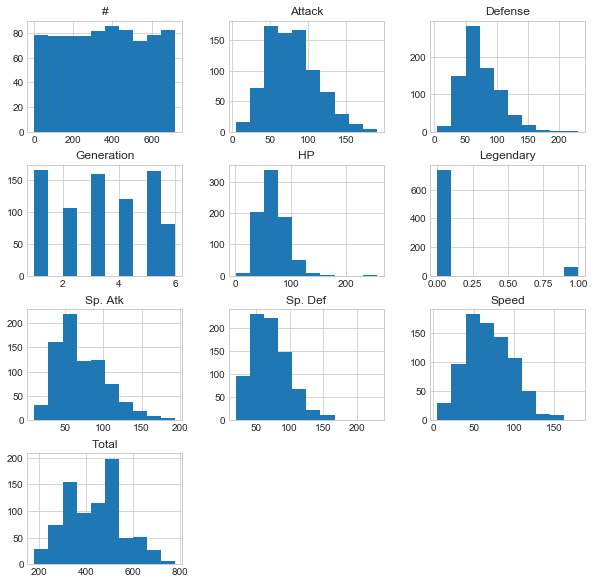

In [110]:
pokemon.hist(figsize=(10,10), xrot=0)
plt.show()

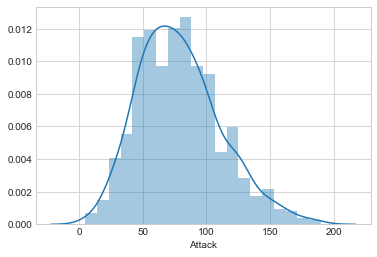

In [155]:
# Distribution Plot (a.k.a. Histogram)

sns.distplot(pokemon.Attack)

## Scatter Plot

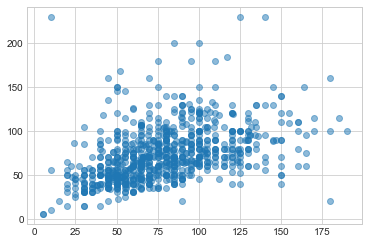

In [117]:
plt.scatter(x=pokemon.Attack, y=pokemon.Defense, alpha=0.5)

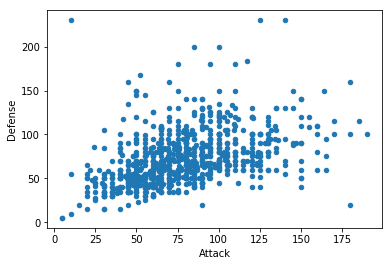

In [26]:
pokemon.plot(x='Attack', y='Defense', kind='scatter')

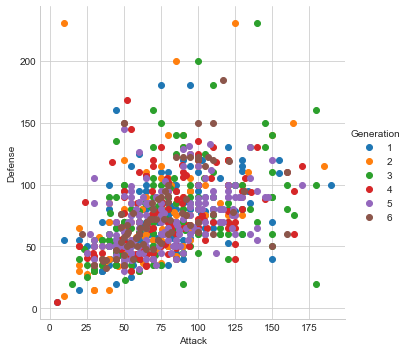

In [75]:
sns.FacetGrid(pokemon, hue="Generation", size=5) \
   .map(plt.scatter, "Attack", "Defense") \
   .add_legend()

(0, 201.43563057321734)

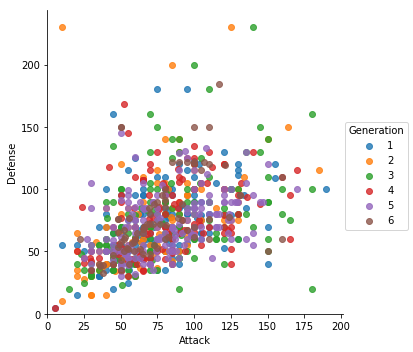

In [34]:
sns.lmplot(x='Attack', y='Defense', data=pokemon, hue='Generation', fit_reg=False)
# sns.lmplot(x=pokemon.Attack, y=pokemon.Defense)
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

## Jointplot

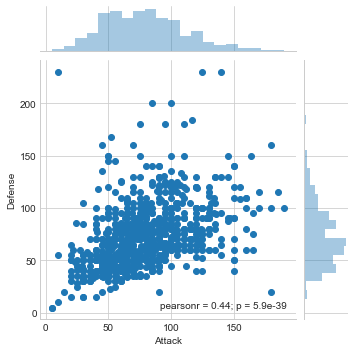

In [73]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='Attack', y='Defense', data=pokemon, size=5)

## Boxplot

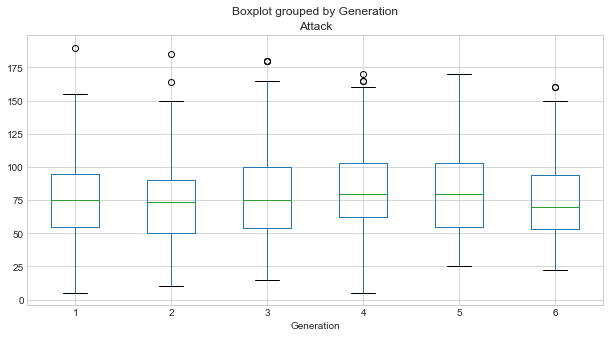

In [97]:
pokemon.boxplot(by='Generation',column='Attack', figsize=(10, 5))

/Users/john/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


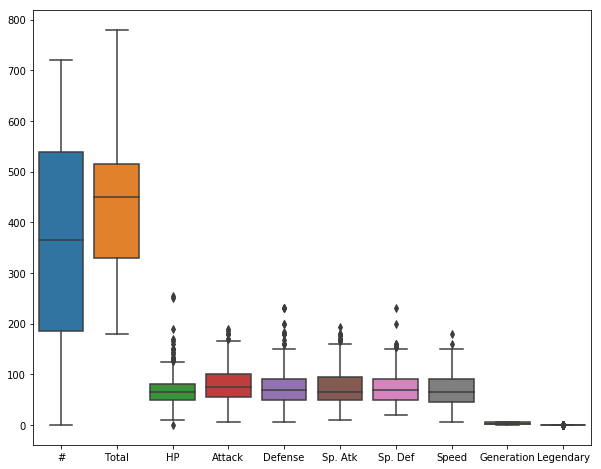

In [40]:
fig, ax = plt.subplots(figsize=(10,8))

sns.boxplot(data=pokemon, ax=ax)

* A box plot only shows summary statistics such as median and interquartile range.
* A violin plot shows the entire probability distribution of the data. (In case you’re wondering,
you don’t need a statistics degree to interpret them.)

Here’s how to interpret violin plots:
* In a violin plot, the thin horizontal bar represents the range (min to max) of the data.
* The thick horizontal bar is the interquartile range (25th percentile to 75th percentile).
* The white dot is the median.
* Finally, the thickness of the "violin" represents the estimated probability density.

## Violin plot

/Users/john/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/john/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


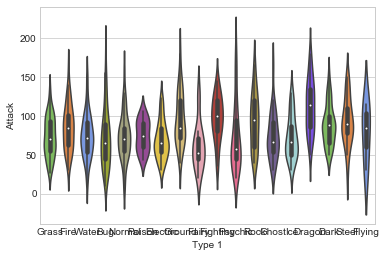

In [103]:
sns.set_style('whitegrid')

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.violinplot(x='Type 1', y='Attack', data=pokemon, palette=pkmn_type_colors)

## Swarm plot

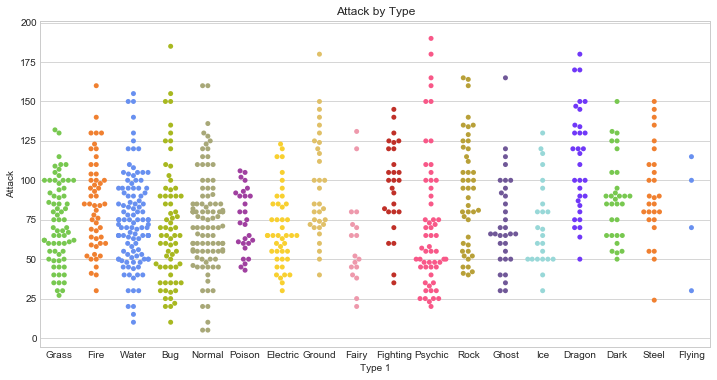

In [49]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))
# Set title with matplotlib
plt.title('Attack by Type')

sns.swarmplot(x='Type 1', y='Attack', data=pokemon, 
              palette=pkmn_type_colors)

## Heatmap

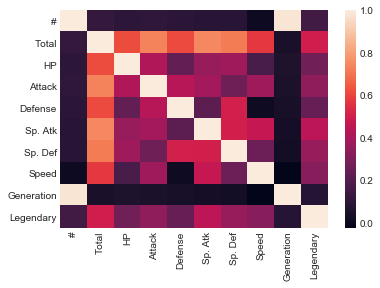

In [50]:
corr = pokemon.corr()
sns.heatmap(corr)

## Bar Plot

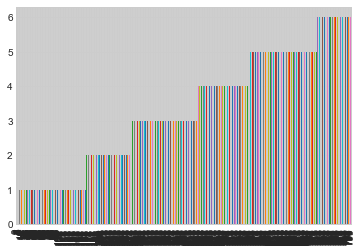

In [162]:
pokemon['Generation'].plot(kind='bar')

/Users/john/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

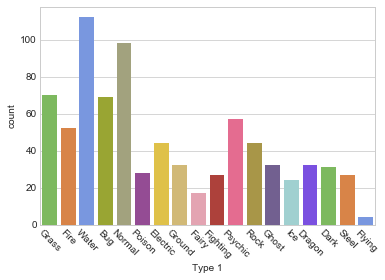

In [52]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=pokemon, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

In [54]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

/Users/john/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


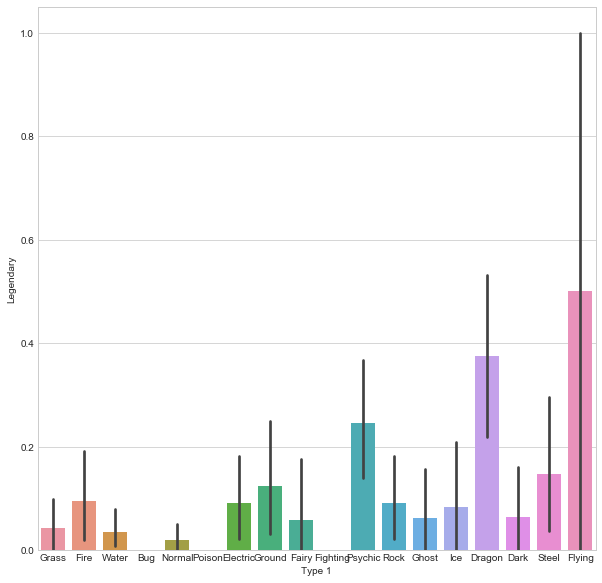

In [69]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Type 1', y='Legendary', data=pokemon)

## Factorplot

/Users/john/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


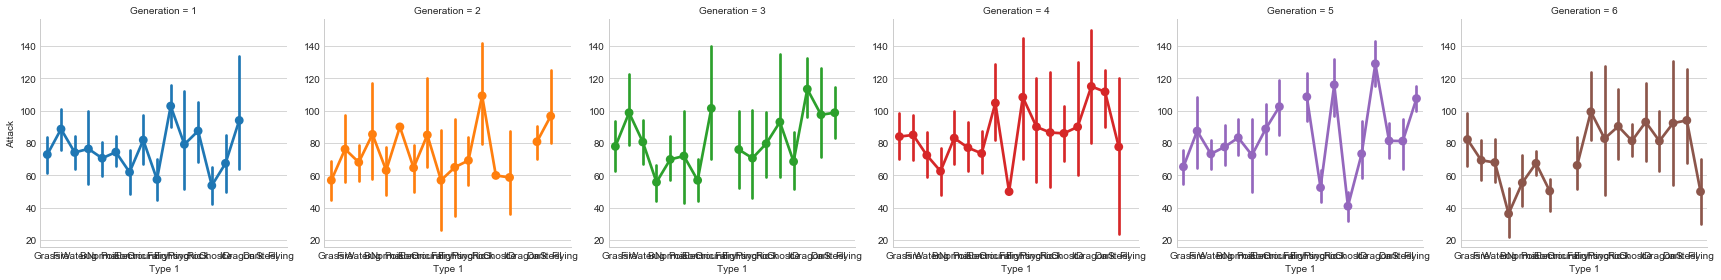

In [177]:
# Factor Plot
sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=pokemon, 
                   hue='Generation',  # Color by stage
                   col='Generation',  # Separate by stage
                   kind='point') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

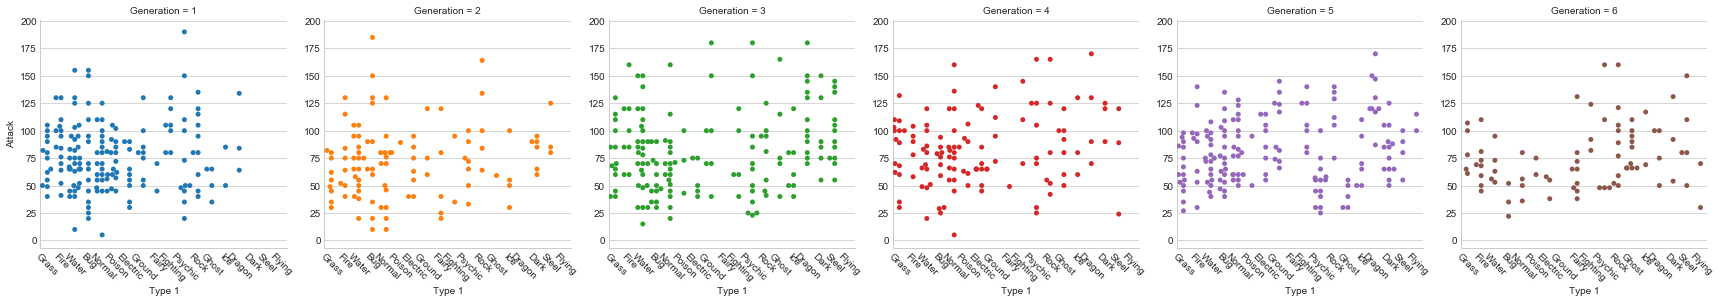

In [157]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=pokemon, 
                   hue='Generation',  # Color by generation
                   col='Generation',  # Separate by generation
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

## Kdeplot

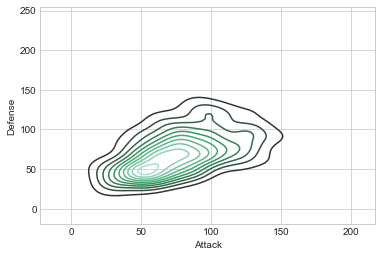

In [83]:
sns.kdeplot(pokemon.Attack, pokemon.Defense)

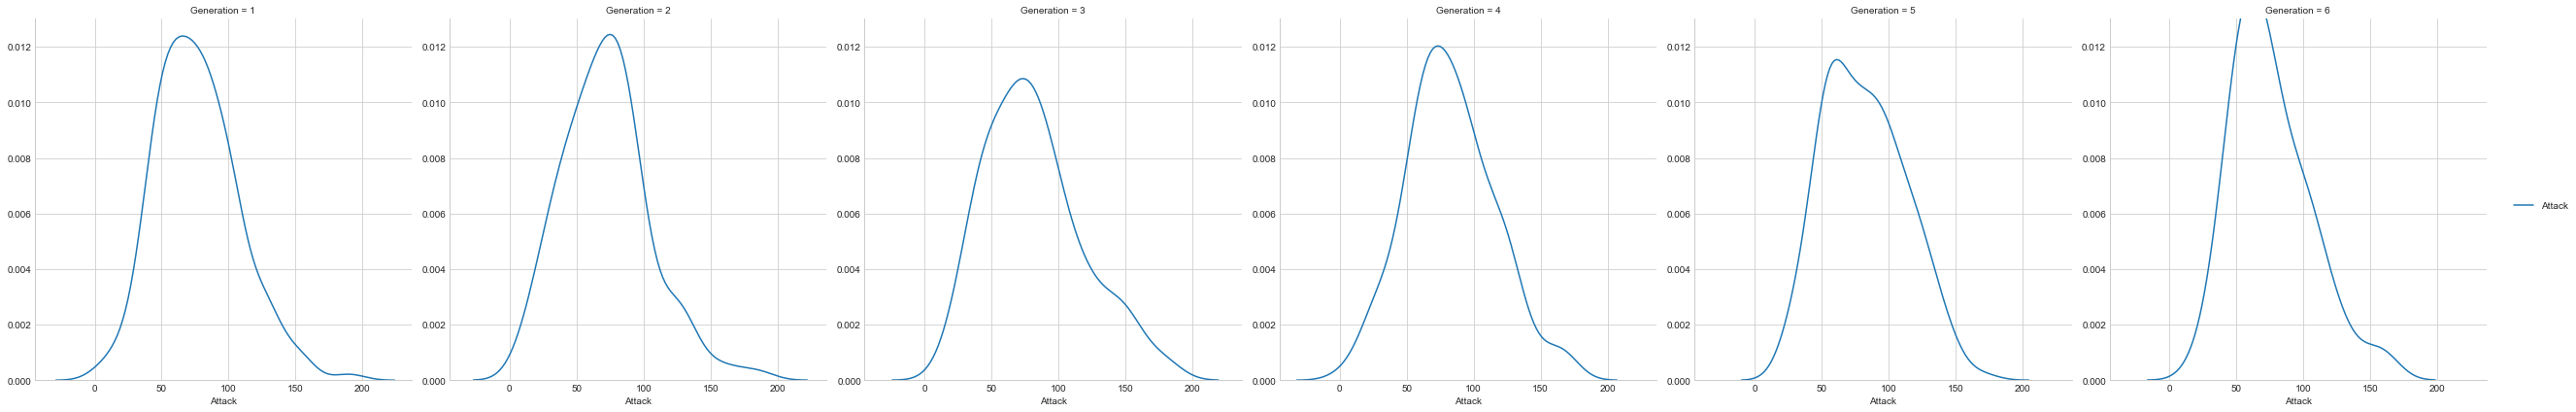

In [163]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(pokemon, col='Generation', size=6) \
   .map(sns.kdeplot, 'Attack') \
   .add_legend()

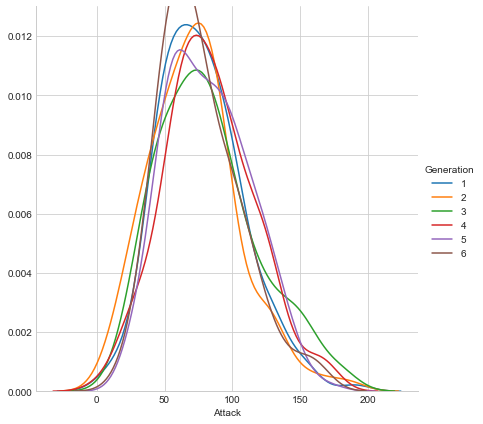

In [164]:
sns.FacetGrid(pokemon, hue='Generation', size=6) \
   .map(sns.kdeplot, 'Attack') \
   .add_legend()

## Pairplot

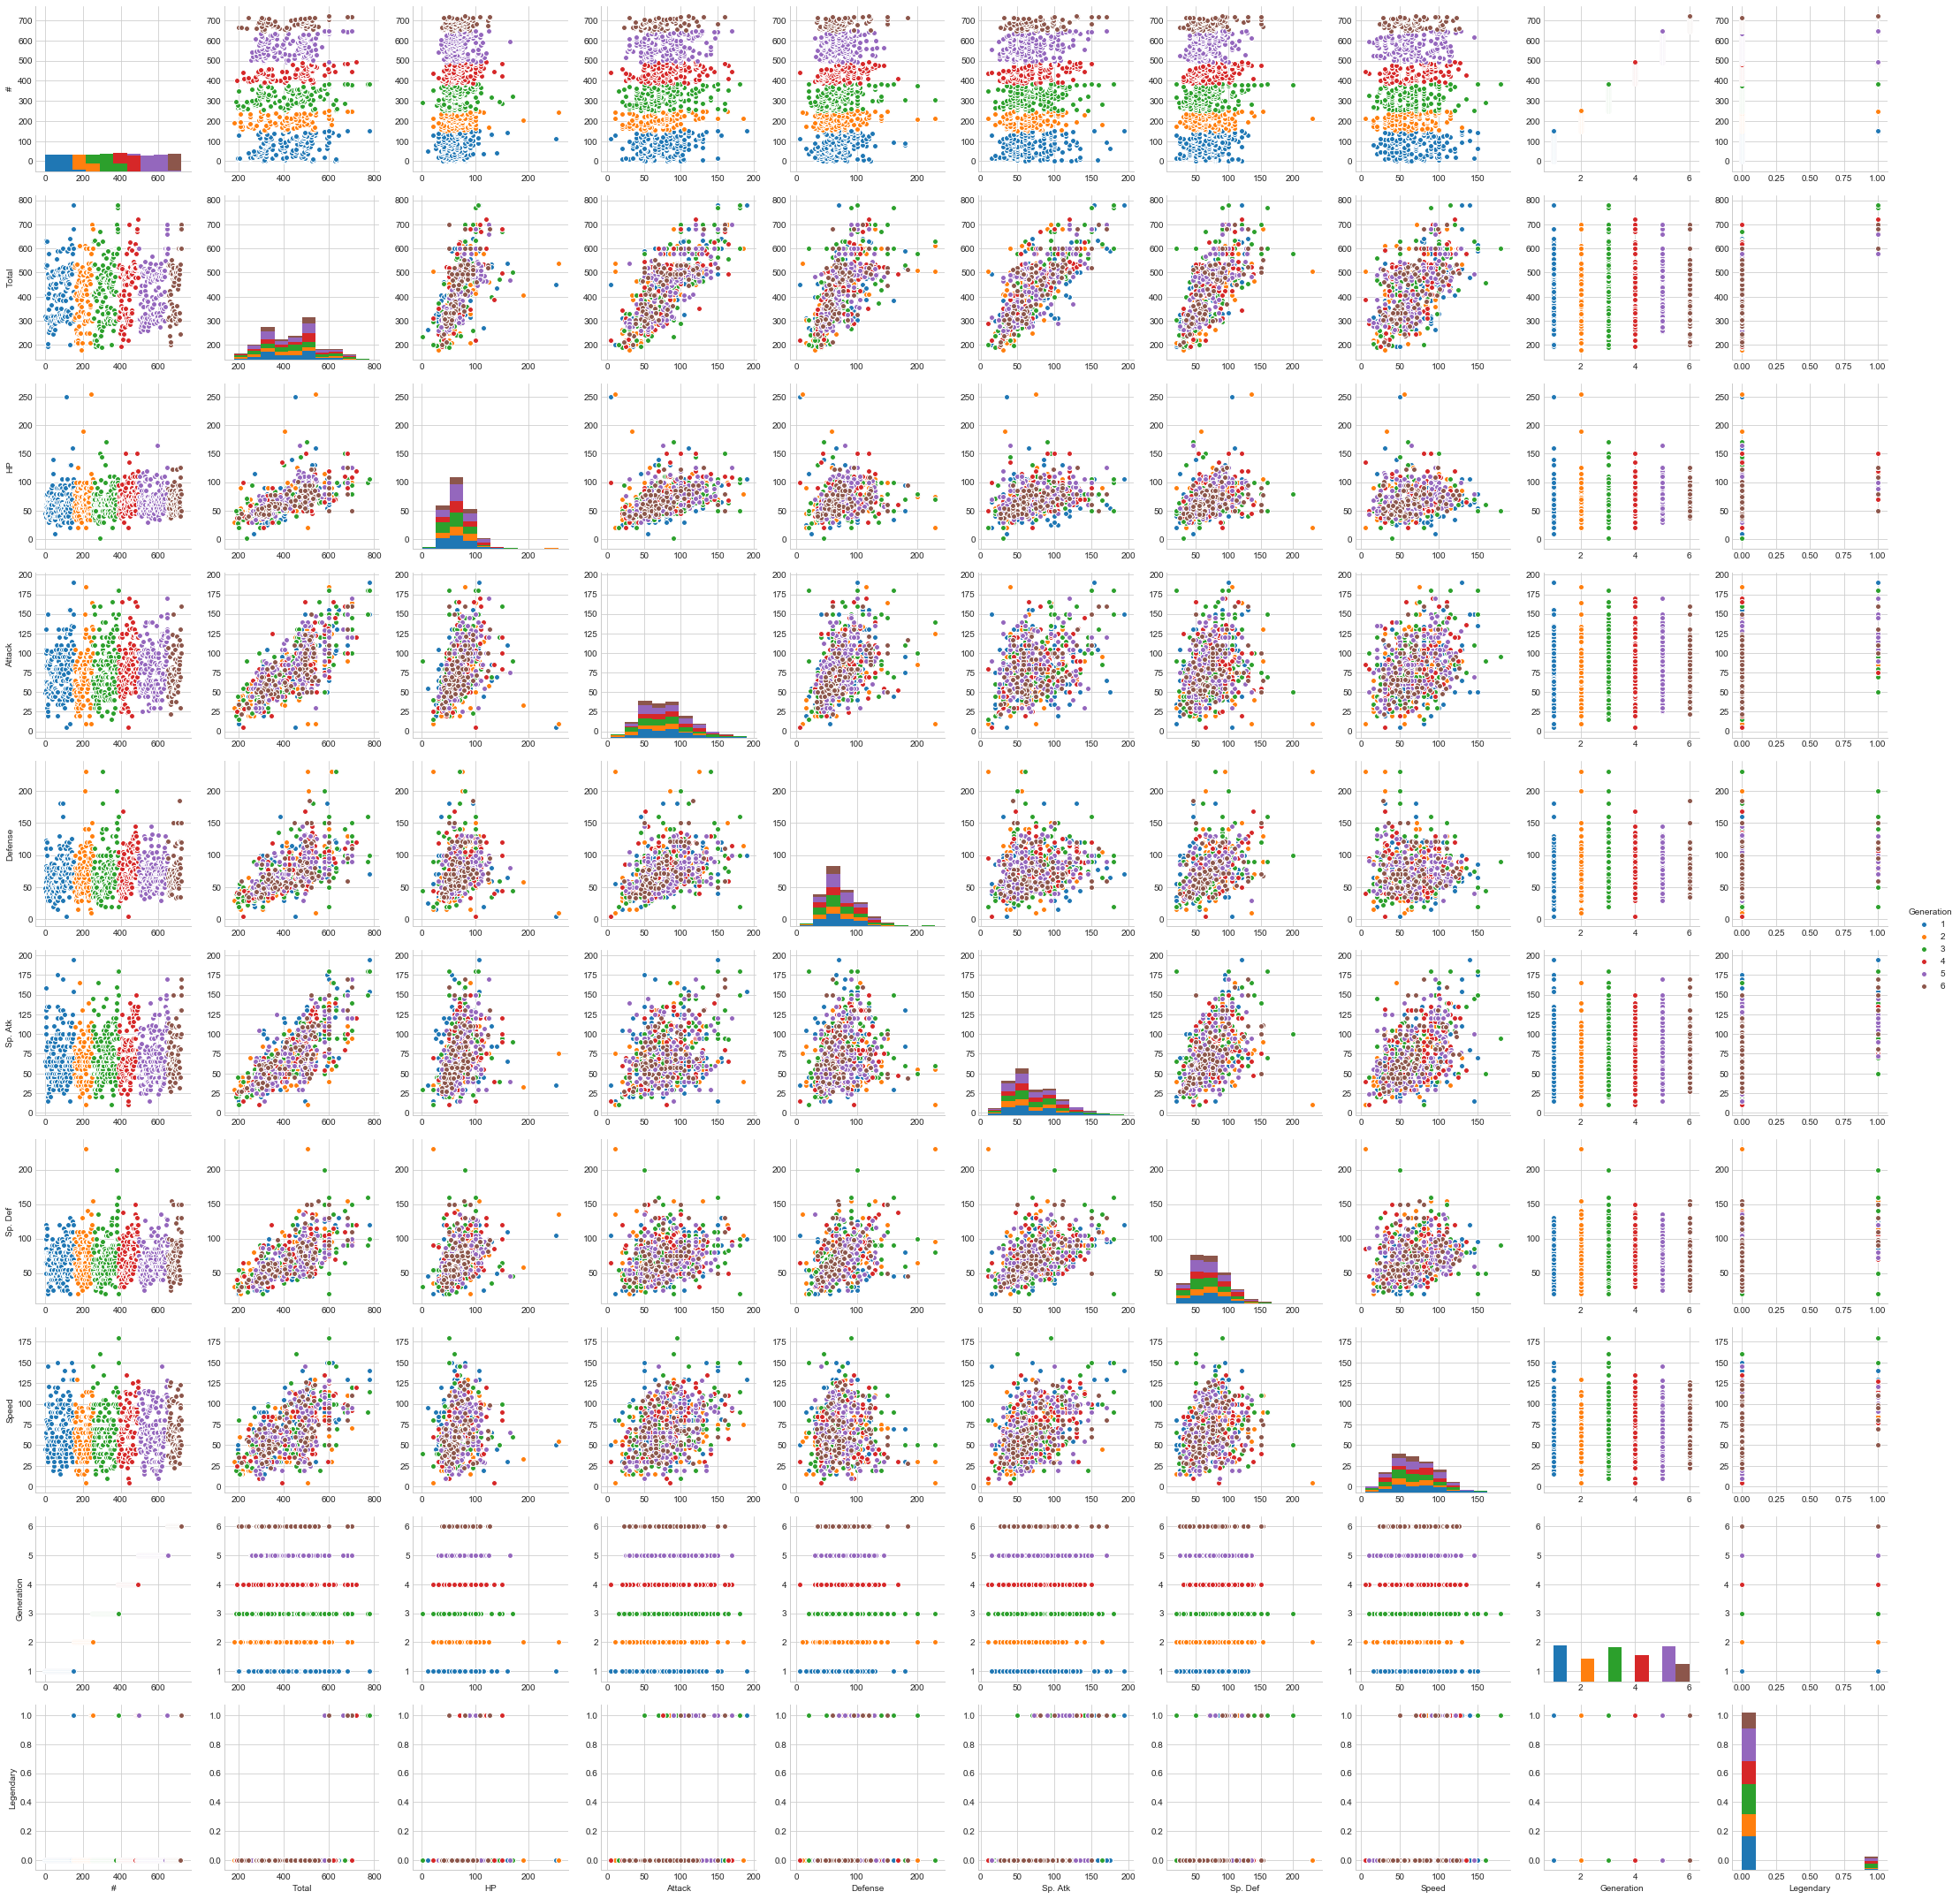

In [87]:
sns.pairplot(pokemon, hue="Generation", size=3, diag_kind='hist')

## BONUS LINE CHART

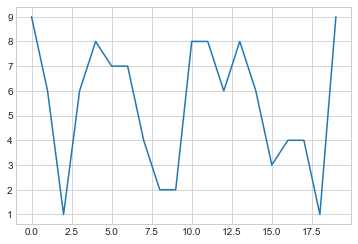

In [136]:
import numpy as np

x = np.arange(0, 20)
y = np.random.randint(1, 10, 20)

plt.plot(x, y)
plt.show()

In [148]:
pokemon[pokemon.Speed == pokemon.Speed.max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


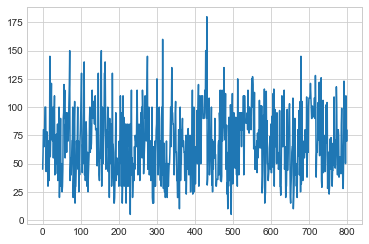

In [151]:
pokemon['Speed'].plot()

/Users/john/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


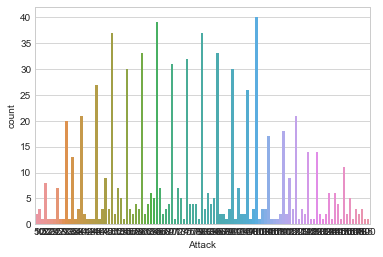

In [141]:
sns.countplot(x='Attack', data=pokemon)